### NLP(Natural Language Processing)-machine learning Classification  2 

Dans l'article précédent, vous avez découvert différentes méthodes d'extraction, telles que la tokenisation, le stemming, la lemmatisation et la suppression de mots vides, qui sont utilisées pour extraire des fonctionnalités d'un texte non structuré. Nous avons également discuté du bag-of-words et (TF-IDF).
Dans cet article  vous apprendrez à utiliser ces fonctionnalités pour développer des modèles de classification de texte. 

Les algorithmes de classification de texte sont au cœur d'une variété de systèmes logiciels qui traitent les données de texte à grande échelle. Le logiciel de messagerie utilise une classification de texte pour déterminer si le courrier entrant est envoyé dans la boîte de réception ou filtré dans le dossier spam. Les forums de discussion utilisent la classification de texte pour déterminer si les commentaires doivent être signalés comme inappropriés. 

Un autre type courant de classification de texte est l'analyse des sentiments , dont le but est d'identifier la polarité du contenu du texte: le type d'opinion qu'il exprime. Cela peut prendre la forme d'une évaluation binaire comme 
j'aime/ je n'aime pas, ou un ensemble d'options, comme une évaluation par étoiles de 1 à 5. Les exemples d'analyse de sentiment incluent l'analyse des publications Twitter pour déterminer si les gens ont aimé le film Black Panther, ou extrapolant l'opinion du grand public sur une nouvelle marque de chaussures Nike issue des revues Walmart.

Ce guide vous apprendra quelques bonnes pratiques d'apprentissage automatique clés pour résoudre les problèmes de classification de texte. Voici ce que vous apprendrez:

* Le flux de travail de haut niveau de bout en bout pour résoudre les problèmes de classification de texte à l'aide de l'apprentissage automatique
* Comment choisir le bon modèle pour votre problème de classification de texte
* Comment implémenter votre modèle de choix

## Workflow de classification de texte

Voici un aperçu de haut niveau du flux de travail utilisé pour résoudre les problèmes d'apprentissage automatique:

* Étape 1: recueillir des données
* Étape 2: explorez vos données
* Étape 2.5: Choisissez un modèle *
* Étape 3: Préparez vos données
* Étape 4: Créez, formez et évaluez votre modèle
* Étape 5: régler les hyperparamètres
* Étape 6: déployez votre modèle

## Étape 1: recueillir des données
La collecte de données est l'étape la plus importante pour résoudre tout problème d'apprentissage automatique supervisé. Votre classificateur de texte ne peut être aussi bon que l'ensemble de données à partir duquel il est construit.

Tout au long de ce guide, nous utiliserons l'ensemble de données de Produits Cdiscount. Il s'agit d'une version simplifiée du concours proposé par Cdiscount et paru sur le site datascience.net. Les données d'apprentissage sont accessibles sur demande auprès de Cdiscount mais les solutions de l'échantillon test du concours ne sont pas et ne seront pas rendues publiques. Un échantillon test est donc construit pour l'usage de cet Article.

lien de téléchargement : https://github.com/wikistat/AI-Frameworks/tree/master/NatualLangageProcessing/data

L'objectif est de prévoir la catégorie d'un produit à partir de son descriptif . Seule la catégorie principale (1er niveau, 44 classes) est prédite au lieu des trois niveaux demandés dans le concours. L'objectif est plutôt de comparer les performances des méthodes et technologies en fonction de la taille de la base d'apprentissage ainsi que d'illustrer sur un exemple complexe le prétraitement de données textuelles.

## Étape 2: explorez vos données
La création et la formation d'un modèle ne sont qu'une partie du flux de travail. Comprendre les caractéristiques de vos données au préalable vous permettra de construire un meilleur modèle. Cela pourrait simplement signifier obtenir une précision plus élevée. Cela pourrait également signifier exiger moins de données pour la formation ou moins de ressources de calcul.

### Charger l'ensemble de données

Tout d'abord, chargeons l'ensemble de données dans Python

##### Read & Split Dataset

On définit une fonction permettant de lire le fichier d'apprentissage et de créer deux DataFrame Pandas, un pour l'apprentissage, l'autre pour la validation. La fonction créée un DataFrame en lisant entièrement le fichier. Puis elle scinde ce DataFrame en deux grâce à la fonction dédiée de sklearn.

In [2]:
def split_dataset(input_path, nb_line, tauxValid):
    data_all = pd.read_csv(input_path,sep=",", nrows=nb_line)
    data_all = data_all.fillna("")
    data_train, data_valid = sms.train_test_split(data_all, test_size = tauxValid,random_state=47)
    return data_train, data_valid

In [3]:
import sklearn.model_selection as sms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
input_path = "data/cdiscount_train.csv.zip"
nb_line=200000 # part totale extraite du fichier initial ici déjà réduit
tauxValid = 0.2
data_train, data_valid = split_dataset(input_path, nb_line, tauxValid)
data_train.reset_index(inplace = True)
data_valid.reset_index(inplace = True)

N_train = data_train.shape[0]
N_valid = data_valid.shape[0]
print("Train set : %d elements, Validation set : %d elements" %(N_train, N_valid))

Train set : 160000 elements, Validation set : 40000 elements


###### Vérifiez les données
Après avoir chargé les données, il est recommandé de procéder à certaines vérifications : choisissez quelques échantillons et vérifiez manuellement s'ils sont conformes à vos attentes. Par exemple, imprimez quelques échantillons aléatoires pour voir si l'étiquette correspond a la description.

La commande suivante permet d'afficher les premières lignes du fichiers.

In [144]:
data_train.head(5)

,index,Categorie1,Categorie2,Categorie3,Description,Libelle,Marque
0,15171,ADULTE - EROTIQUE,SEXTOYS,GODEMICHET - RABIT - VIBROMASSEUR,Gode super réaliste ventouse haute qualité 15c...,Gode super réaliste ventouse haute qualité 15cm,AUCUNE
1,6969,SONO - DJ,AMPLIFICATION ET RESTITUTION DU SON,MICROPHONE DE CHANT - A MAIN - CRAVATE - MICRO...,Omni-Direct Microphone dynamique - Conçu pour ...,Omni-Direct Microphone dynamique,RADIOSHACK
2,25133,AUTO - MOTO (NEW),CONFORT CONDUCTEUR ET PASSAGER,ACCOUDOIRS,Accoudoir pour Citroen C4 II 2010 - Accoudoir ...,Accoudoir pour Citroen C4 II 2010,AUCUNE
3,21355,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Coque souple Rose pour HTC ONE MINI motif I LO...,Coque souple Rose pour HTC ONE MINI motif I LOV…,MUZZANO
4,12737,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,HOUSSE - ETUI - CHAUSSETTE,Coque rigide Rose pour LG OPTIMUS G2 motif Géo...,Coque rigide Rose pour LG OPTIMUS G2 motif Géom…,MUZZANO


Vous pouvez observer que chaque produit possède 3 niveaux de Catégories, qui correspondent au différents niveaux de l'arborescence que vous retrouverez sur le site. Il y a 44 catégories de niveau 1, 428 de niveau 2 et 3170 de niveau 3.
Dans cet article, nous nous interesserons uniquement à classer les produits dans la catégorie de niveau 1.

La commande suivante permet d'afficher un exemple de produits pour chaque Catégorie de niveau 1.

In [145]:
data_train.groupby("Categorie1").first()[["Description","Libelle","Marque"]]

,Description,Libelle,Marque
Categorie1,,,
ADULTE - EROTIQUE,Gode super réaliste ventouse haute qualité 15c...,Gode super réaliste ventouse haute qualité 15cm,AUCUNE
ANIMALERIE - NEW,Une ambiance douce et relaxante pour votre ani...,Couchette animale Niclas S marron et blanc,AUCUNE
ARME DE COMBAT - ARME DE SPORT,Tapis micro fibres de la marque EclipseIdéal p...,Tapis micro fibres de la marque Eclipse,PLANET ECLIPSE
ART DE LA TABLE - ARTICLES CULINAIRES,Sac à tarte Derrière La Porte Le dessert - Sac...,Sac à tarte Derrière La Porte Le dessert,DERRIERE LA PORTE
ARTICLES POUR FUMEUR,"Le vaporisateur Imag+ est joli, discret. Peut ...",IMAG PLUS,AUCUNE
AUTO - MOTO (NEW),Accoudoir pour Citroen C4 II 2010 - Accoudoir ...,Accoudoir pour Citroen C4 II 2010,AUCUNE
BAGAGERIE,Sac bandoulière - Modèle féminin et chic Matiè...,Sac bandoulière,AUCUNE
BATEAU MOTEUR - VOILIER,ANTIFOULING AEROSOL 500ML - 19990 Noir - Antif...,ANTIFOULING AEROSOL 500ML - 19990 Noir,AUCUNE
BIJOUX - LUNETTES - MONTRES,"Collier Argent ""Etoile"" blanc - Indémodable et...","Collier Argent ""Etoile"" blanc",LES TRESORS DE LILY


##### Collectez les mesures clés
Une fois que vous avez vérifié les données, collectez les mesures importantes suivantes qui peuvent vous aider à caractériser votre problème de classification de texte:

* **la taille  d'échantillons** : nombre total d'exemples que vous avez dans les données.

* **Nombre de classes** : nombre total de sujets ou de catégories dans les données
* **Nombre d'échantillons par classe** : Nombre d'échantillons par classe (sujet / catégorie). Dans un ensemble de données équilibré, toutes les classes auront un nombre similaire d'échantillons; dans un ensemble de données déséquilibré, le nombre d'échantillons dans chaque classe variera considérablement.

* **Nombre de mots par échantillon** : nombre médian de mots dans un échantillon.

*  **Distribution de fréquence des mots** : Distribution montrant la fréquence (nombre d'occurrences) de chaque mot dans l'ensemble de données.

* **Distribution de la longueur de l'échantillon** : Distribution montrant le nombre de mots par échantillon dans l'ensemble de données.


In [9]:
def get_num_words_per_sample(sample_texts):
    """Returns the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s.split()) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()
    
def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    """Plots the frequency distribution of n-grams.
    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]
    
    fig=plt.figure(figsize= (20,10))
    ax = fig.add_subplot(1,1,1)
    idx = np.arange(num_ngrams)
    plt.bar(idx, counts, width=0.7, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=45)
    plt.show()

In [8]:
#la taille d'échantillons
data_train["Categorie1"].count()

160000

In [10]:
#total number of classes
data_train["Categorie1"].value_counts().count()

44

L'une de nos principales préoccupations lors de l'élaboration d'un modèle de classification est de savoir si les différentes classes sont équilibrées . Cela signifie que l'ensemble de données contient une partie à peu près égale de chaque classe.
Par exemple, si nous avions deux classes et 95% des observations appartenant à l'une d'elles, un classificateur stupide qui produirait toujours la classe majoritaire aurait une précision de 95%, bien qu'il échouerait à toutes les prédictions de la classe minoritaire.

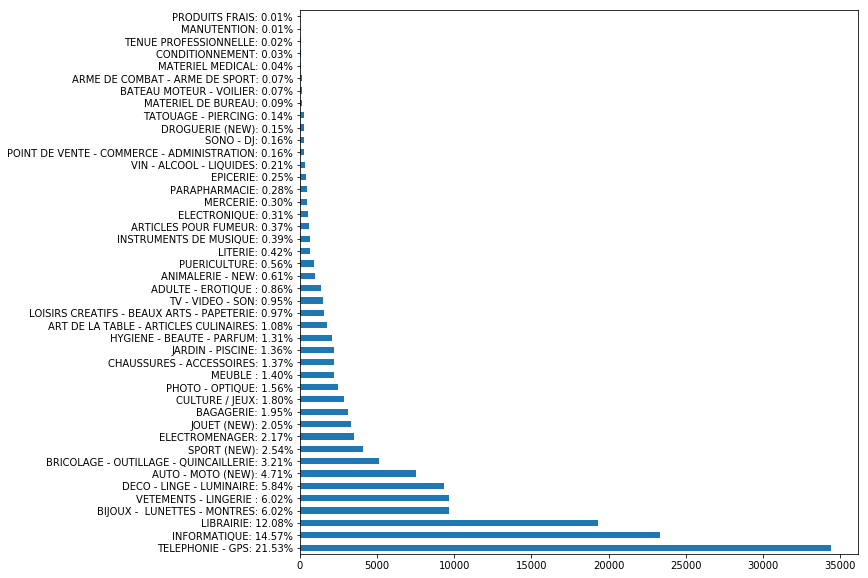

In [11]:
#|Nombre d'échantillons par classe
#Distribution des classes
#Count occurence of each Categorie
data_count = data_train["Categorie1"].value_counts()
#Rename index to add percentage
new_index = [k+ ": %.2f%%" %(v*100/N_train) for k,v in data_count.iteritems()]
data_count.index = new_index

fig=plt.figure(figsize= (10,10))
ax = fig.add_subplot(1,1,1)
data_count.plot.barh(logx = False)
plt.show()

On vois bien que les différentes classes sont déséquilibrés, Il existe plusieurs façons de traiter les ensembles de données déséquilibrés. Une première approche consiste à sous - échantillonner la classe majoritaire et à suréchantillonner celle minoritaire, afin d'obtenir un ensemble de données plus équilibré. Une autre approche peut être d'utiliser d'autres mesures d'erreur au-delà de la accuracy telles que la précision , le rappel ou le score F1 .

In [12]:
get_num_words_per_sample(data_train["Description"])

27.0

Voyons quelles sont les valeurs de ces métriques pour notres l'ensemble de données

|Nom métrique |	Valeur métrique|
|-------------|----------------|
|Nombre d'échantillons |	40850|
|Nombre de classes|44
|Nombre de mots par échantillon|	27

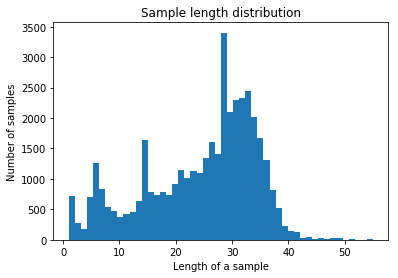

In [149]:
plot_sample_length_distribution(data_train["Description"])

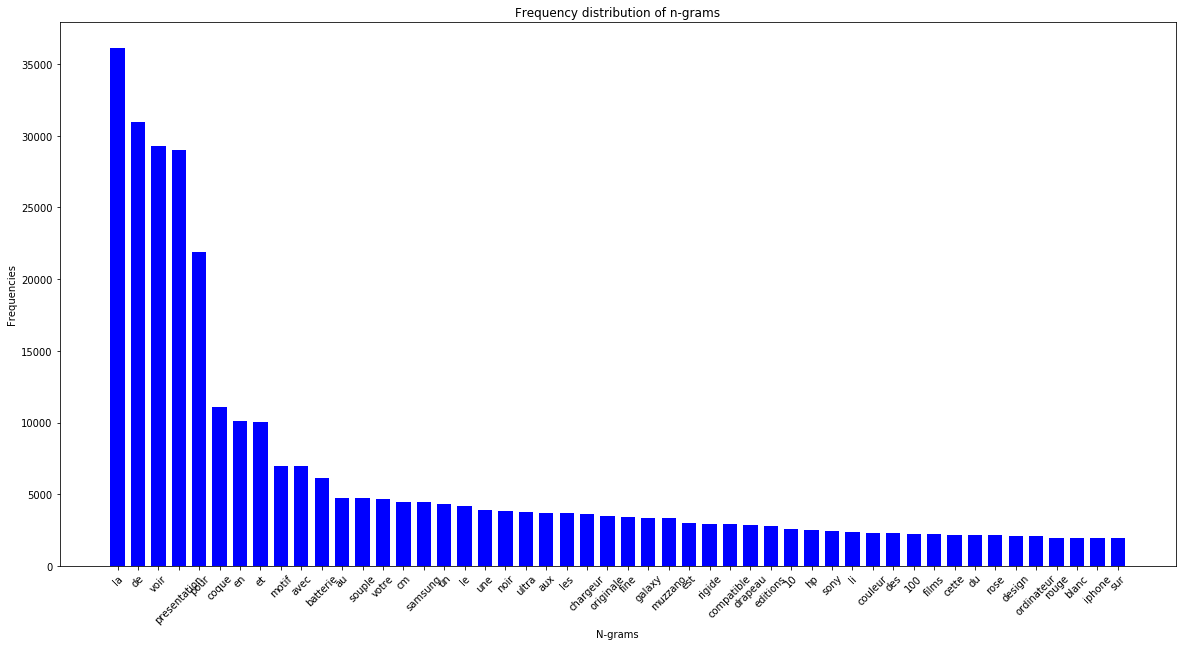

In [150]:
plot_frequency_distribution_of_ngrams(data_train["Description"])

## Étape 2.5: Choisissez un modèle

À ce stade, nous avons assemblé notre ensemble de données et obtenu un aperçu des principales caractéristiques de nos données. Ensuite, sur la base des métriques que nous avons rassemblées à l' étape 2 , nous devons réfléchir au modèle de classification que nous devons utiliser. Cela signifie poser des questions telles que: 

* Comment présenter les données de texte à un algorithme qui attend une entrée numérique?» (cela s'appelle le prétraitement et la vectorisation des données)
* Quel type de modèle devons-nous utiliser?
* Quels paramètres de configuration devons-nous utiliser pour notre modèle? , etc.

Grâce à des décennies de recherche, nous avons accès à un large éventail d'options de prétraitement des données et de configuration des modèles. Cependant, la disponibilité d'un très large éventail d'options fiables à choisir augmente considérablement la complexité et la portée du problème particulier à résoudre. 

Étant donné que les meilleures options peuvent ne pas être évidentes, une solution naïve serait d'essayer toutes les options possibles de manière exhaustive, en élaguant certains choix par intuition. Cependant, cela coûterait énormément cher.

Dans cet article, nous tentons de simplifier considérablement le processus de sélection d'un modèle de classification de texte. Pour un ensemble de données donné, notre objectif est de trouver l'algorithme qui atteint une précision proche du maximum tout en minimisant le temps de calcul requis pour la formation.


L'algorithme de sélection de modèle et l'organigramme ci-dessous sont un résumé pour construire votre première expérience . expliqueront en détail.

1. Calculez le ratio entre le  nombre d'échantillons / nombre de mots par rapport à l'échantillon. 
2. Si ce ratio est inférieur à 1 500, jetez le texte en n-grammes (branche de gauche dans l'organigramme ci-dessous): 

  * a. Divisez les échantillons en n-grammes de mots; convertir les n-grammes en vecteurs. 
  * b. Marquez l'importance des vecteurs, puis sélectionnez les 20K premiers en utilisant les scores. 
  * c. Créez un modèle MLP .. . 
3. Si le rapport est supérieur à 1500, jetez le texte en séquences et utilisez un 
   modèle de sequence pour les classer (branche de droite dans l'organigramme ci-dessous):  
  * a. Divisez les échantillons en mots; sélectionnez les 20 premiers mots en fonction de leur fréquence.
  * b. Convertissez les échantillons en vecteurs de séquence de mots. 
  * c. Si le nombre d'échantillons / nombre de mots par échantillon d'origine est inférieur
     que 15K, l'utilisation d'une intégration pré-entraînée affinée avec le 
     modèle de sequence  fournira probablement les meilleurs résultats. 
4. Mesurez les performances du modèle avec différentes valeurs d'hyperparamètre pour trouver 
   la meilleure configuration de modèle pour l'ensemble de données.

Dans l'organigramme ci-dessous, les cases jaunes indiquent les processus de préparation des données et des modèles. Les cases grises et vertes indiquent les choix que nous avons envisagés pour chaque processus. Les cases vertes indiquent notre choix recommandé pour chaque processus.

Vous pouvez utiliser cet organigramme comme point de départ pour construire votre première expérience, car il vous donnera une bonne précision à faible coût de calcul. Vous pouvez ensuite continuer à améliorer votre modèle initial au cours des itérations suivantes

![](data/orga.PNG)

Cet organigramme répond à deux questions clés:

* Quel algorithme ou modèle d'apprentissage devrions-nous utiliser?

* Comment préparer les données pour apprendre efficacement la relation entre le texte et l'étiquette?

La réponse à la deuxième question dépend de la réponse à la première question; la façon dont nous pré-traitons les données à introduire dans un modèle dépendra du modèle que nous choisirons. Les modèles peuvent être classés en deux grandes catégories:

* ceux qui utilisent des informations de classement des mots (modèles de séquence) 
* ceux qui ne voient que le texte comme des «sacs» (ensembles) de mots (modèles à n grammes).

Les types de modèles de séquence comprennent les réseaux de neurones convolutifs (CNN), les réseaux de neurones récurrents (RNN) et leurs variations.

Les types de modèles à n grammes incluent la régression logistique , les perceptrons multicouches simples (MLP ou réseaux neuronaux entièrement connectés), les arbres boostés par le gradient et les machines à vecteurs de support ...

Selon les expériences menées par les chercheurs , nous avons observé que le rapport du «la taile d'échantillons» (S) au «nombre de mots par échantillon» (W) est en corrélation avec le modèle qui fonctionne bien.

Lorsque la valeur de ce rapport est petite (<1500), les modèle qui prennent n-grammes en entrée (que nous appellerons Option A ) fonctionnent mieux ou au moins aussi bien que les modèles de séquence. Les modèle qui prennent n-grammes en entrée sont simples à définir et à comprendre, et ils prennent moins de temps de calcul que les modèles de séquence. Lorsque la valeur de ce rapport est grande (> = 1500), utilisez un modèle de séquence ( option B ). Dans les étapes qui suivent, vous pouvez passer aux sous-sections pertinentes (étiquetées A ou B ) pour le type de modèle que vous avez choisi en fonction du rapport échantillons / mots par échantillon.

Dans le cas de notre jeu de données, nous allons d'abord implémenter l'option A , puis une autre option B prochainement.

### Étape 3: Préparez vos données

Avant que nos données puissent être introduites dans un modèle, elles doivent être transformées dans un format que le modèle peut comprendre

Premièrement, les échantillons de données que nous avons collectés peuvent être dans un ordre spécifique. Nous ne voulons pas que les informations associées à l'ordre des échantillons influencent la relation entre les textes et les étiquettes. Par exemple, si un ensemble de données est trié par classe et ensuite divisé en ensembles d'apprentissage / validation, ces ensembles ne seront pas représentatifs de la distribution globale des données.

Une bonne pratique simple pour garantir que le modèle n'est pas affecté par l'ordre des données est de toujours mélanger les données avant de faire quoi que ce soit. Si vos données sont déjà divisées en ensembles de formation et de validation, assurez-vous de transformer vos données de validation de la même manière que vous transformez vos données de formation. Si vous n'avez pas encore d'ensembles de formation et de validation séparés, vous pouvez diviser les échantillons après avoir mélangé, il est habituel d'utiliser 80% des échantillons pour la formation et 20% pour la validation.

Deuxièmement, les algorithmes d'apprentissage machine prennent les nombres comme entrées. Cela signifie que nous devrons convertir les textes en vecteurs numériques. Ce processus comporte deux étapes :

* Tokenisation : divisez les textes en mots ou en sous-textes plus petits, ce qui permettra une bonne généralisation des relations entre les textes et les labels. Cela détermine le «vocabulaire» de l'ensemble de données (ensemble de jetons uniques présents dans les données).

* Vectorisation : définir une bonne mesure numérique pour caractériser ces textes.

Voyons comment effectuer ces deux étapes pour les vecteurs n-gramme et les vecteurs de séquence, ainsi que pour optimiser les représentations vectorielles à l'aide des techniques de sélection et de normalisation des caractéristiques.

#### Vecteurs à N grammes [Option A]
Dans les paragraphes suivants, nous verrons comment effectuer la tokenisation et la vectorisation pour les modèles à n grammes. Nous verrons également comment nous pouvons optimiser la représentation du gramme en utilisant des techniques de sélection et de normalisation des caractéristiques.

Dans un vecteur n-gram, le texte est représenté comme une collection de n-grammes uniques: des groupes de n jetons adjacents (généralement, des mots). Considérez le texte " Je vais au concert ce soir". Ici, les mots unigrammes (n = 1) le sont ['je', 'vais', 'au', 'concert', 'ce','soir'], le mot bigrammes (n = 2) le sont ['je vais', 'vais au', 'au concert', 'concert ce', 'ce soir'], etc..


###### Tokenisation
Nous avons constaté que la tokenisation en mots unigrammes + bigrammes fournit une bonne précision tout en prenant moins de temps de calcul.

###### Vectorisation
Une fois que nous avons divisé nos échantillons de texte en n-grammes, nous devons transformer ces n-grammes en vecteurs numériques que nos modèles d'apprentissage automatique peuvent traiter. L'exemple ci-dessous montre les index attribués aux unigrammes et bigrammes générés pour deux exemples de textes.

Textes: **'La souris a couru vers le haut '** et **'La souris a couru vers le bas'** 

Index attribué à chaque jeton: {'le': 1, 'souris': 2, 'a': 3 'couru': 4, 'vers': 5, 'haut': 6, 
  ' la souris ': 7,'souris a': 8,' a couru ': 9,'couru vers ': 10,'vers le ': 11,'le haut': 12,'bas': 13, 'le bas': 14}

Une fois que les index sont attribués aux n-grammes, nous vectorisons généralement en utilisant l'une des options suivantes.

**One-hot encoding** : chaque exemple de texte est représenté par un vecteur de longueur N, où N est la taille du vocabulaire. Le vocabulaire est le nombre total de mots uniques dans le document. ce vecteur indiquant la présence ou l'absence d'un jeton dans le texte.

'La souris a couru vers le haut' = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,0,0]


**Count encoding**: chaque exemple de texte est représenté comme un vecteur indiquant le décompte d'un jeton dans le texte. Notez que l'élément correspondant à l'unigramme «le»  est maintenant représenté par 2 car le mot «le» apparaît deux fois dans le texte.

'La souris a couru vers le haut' = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,0,0]


Tf-idf encoding: Le problème avec les deux approches ci-dessus est que les mots communs qui apparaissent a des fréquences similaires dans tous les documents (c'est-à-dire les mots qui ne sont pas particulièrement spécifiques aux échantillons de texte dans l'ensemble de données) ne sont pas pénalisés. Par exemple, des mots comme «a» apparaîtront très fréquemment dans tous les textes. Ainsi, un nombre de jetons plus élevé pour «le» que pour d'autres mots plus significatifs n'est pas très utile.

'La souris a couru vers le haut' = [0.23, 0.33, 0.33, 0.33, 0.33, 0.47, 0.33, 0.33, 0.23, 0.33, 0.33,0.47, 0, 0]


Il existe de nombreuses autres représentations vectorielles, mais les trois ci-dessus sont les plus couramment utilisées.

Nous avons observé que le codage tf-idf est légèrement meilleur que les deux autres en termes de précision (en moyenne: 0,25 à 15% plus élevé), et nous recommandons d'utiliser cette méthode pour vectoriser les n-grammes. Cependant, gardez à l'esprit qu'il occupe plus de mémoire (car il utilise une représentation en virgule flottante) et prend plus de temps à calculer, en particulier pour les grands ensembles de données (peut prendre deux fois plus de temps dans certains cas).

#### Sélection des  Features

Lorsque nous convertissons tous les textes d'un ensemble de données en jetons mot uni + bigram, nous pouvons nous retrouver avec des dizaines de milliers de jetons. Tous ces jetons / fonctionnalités ne contribuent pas à la prédiction d'étiquette. Nous pouvons donc supprimer certains jetons, par exemple ceux qui se produisent extrêmement rarement dans l'ensemble de données. Nous pouvons également mesurer l'importance des fonctionnalités (dans quelle mesure chaque jeton contribue aux prédictions d'étiquette), et inclure uniquement les jetons les plus informatifs.

Il existe de nombreuses fonctions statistiques qui prennent les features et les étiquettes correspondantes et affichent le score d'importance des features. Deux fonctions couramment utilisées sont **f_classif** et **chi2** . Nos expériences montrent que ces deux fonctions fonctionnent également bien.

 

### Normalisation

La normalisation convertit toutes les valeurs de caractéristique en valeurs petites et similaires. Cela simplifie la convergence de descente de gradient dans les algorithmes d'apprentissage. D'après ce que nous avons vu, la normalisation pendant le prétraitement des données ne semble pas ajouter beaucoup de valeur aux problèmes de classification de texte; nous vous recommandons de sauter cette étape.


Le code suivant regroupe toutes les étapes ci-dessus:

* Tokenize des échantillons de texte en mot uni + bigrammes,
* Vectoriser en utilisant l'encodage tf-idf,
* Sélectionnez uniquement les 20 000 premières fonctionnalités du vecteur de jetons en supprimant les jetons qui apparaissent      moins de 2 fois et en utilisant f_classif pour calculer l'importance des fonctionnalités.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from spacy.lang.fr import French

nlp = French()

def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [word.lemma_.lower() for word in mytokens if
                not word.is_punct and not word.like_num and word.text != 'n']

    # Removing stop words
    mytokens = [word for word in mytokens if word not in stop_words]

    # Remove accentuated char for any unicode symbol
    mytokens = [strip_accents_ascii(word) for word in mytokens]

    # return preprocessed list of tokens
    return mytokens

# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2)

# Limit on the number of features. We use the top 20K features.
TOP_K = 20000

# Whether text should be split into word or character n-grams.
# One of 'word', 'char'.
TOKEN_MODE = 'word'

# Minimum document/corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 2

def ngram_vectorize(train_texts, train_labels, val_texts):
    """Vectorizes texts as n-gram vectors.

    1 text = 1 tf-idf vector the length of vocabulary of unigrams + bigrams.

    # Arguments
        train_texts: list, training text strings.
        train_labels: np.ndarray, training labels.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val: vectorized training and validation texts
    """
    # Create keyword arguments to pass to the 'tf-idf' vectorizer.
    kwargs = {
            'ngram_range': NGRAM_RANGE,  # Use 1-grams + 2-grams.
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': TOKEN_MODE,  # Split text into word tokens.
            'min_df': MIN_DOCUMENT_FREQUENCY,
    }
    vectorizer = TfidfVectorizer(**kwargs)

    # Learn vocabulary from training texts and vectorize training texts.
    x_train = vectorizer.fit_transform(train_texts)

    # Vectorize validation texts.
    x_val = vectorizer.transform(val_texts)

    # Select top 'k' of the vectorized features.
    selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
    selector.fit(x_train, train_labels)
    x_train = selector.transform(x_train).astype('float32')
    x_val = selector.transform(x_val).astype('float32')
    return x_train, x_val

Avec la représentation vectorielle n-gram, nous jetons beaucoup d'informations sur l'ordre des mots et la grammaire. C'est ce que l'on appelle une approche «sac de mots». Cette représentation est utilisée en conjonction avec des modèles qui ne tiennent pas compte de l'ordre, tels que la régression logistique, les perceptrons multicouches, les machines de renforcement de gradient, les machines à vecteurs de support... etc

### Vecteurs de séquence [Option B]


Dans les paragraphes suivants, nous verrons comment effectuer la tokenisation et la vectorisation pour les modèles de séquence. Nous verrons également comment nous pouvons optimiser la représentation des séquences en utilisant des techniques de sélection et de normalisation des caractéristiques.

Pour certains exemples de texte, l'ordre des mots est essentiel à la signification du texte. Des modèles tels que les CNN / RNN peuvent déduire le sens de l'ordre des mots dans un text. Pour ces modèles, nous représentons le texte comme une séquence de jetons, en préservant l'ordre.

**Tokenisation**

Le texte peut être représenté soit par une séquence de caractères, soit par une séquence de mots. Nous avons constaté que l'utilisation de la représentation au niveau des mots offre de meilleures performances que les jetons de caractères. C'est également la norme générale suivie par l'industrie. L'utilisation de jetons de caractère n'a de sens que si les textes contiennent beaucoup de fautes de frappe, ce qui n'est pas normalement le cas.

**Vectorisation**

Une fois que nous avons converti nos échantillons de texte en séquences de mots, nous devons transformer ces séquences en vecteurs numériques. L'exemple ci-dessous montre les index affectés aux unigrammes générés pour deux textes, puis la séquence d'index de jetons vers laquelle le premier texte est converti.

Il existe de nombreuses bibliothèques puissantes disponibles en Python qui peuvent nous aider dans la tokenisation. Une fois que nous avons converti les données textuelles en jetons, nous devons ensuite mapper chaque jeton sur un vecteur. Le codage **One-hot encoding** et **Word embeddings** sont les deux approches les plus courantes pour mapper des tokens à des  vecteurs. Le diagramme suivant résume les étapes de conversion du texte en leurs représentations vectorielles.

![](data/vect.PNG)

**One-hot encoding** :

Les séquences sont représentées à l'aide de vecteurs de mots dans un espace à n dimensions où n = taille du vocabulaire. Cette représentation fonctionne très bien lorsque nous représentons le text comme une séquence de caractères, et le vocabulaire est donc petit. Lorsque nous tokenisons le text sous forme de mots, le vocabulaire aura généralement des dizaines de milliers de tokens, ce qui rend les vecteurs One-hot encoding très rares et inefficaces.

**Word embeddings**

Word embeddings est une méthode très populaire pour représenter des données textuelles dans des problèmes résolus par des algorithmes d'apprentissage profond.
les mots ont une ou des significations qui leur sont associées. Par conséquent, nous pouvons représenter des jetons de mots dans un espace relativement faible dimension, 
La dimension vectorielle varie en fonction de la taille du vocabulaire. Il est courant d'utiliser un mot de dimension 50, 100, 256, 300 et parfois 1 000, où l'emplacement et la distance entre les mots indiquent leur similitude sémantique. autrement dit les vecteur seront ajustés de manière à ce que les mots les plus proches sémantiquement aient une représentation similaire.

**Word embeddings pré-formés** 
Il existe un certain nombre de vecteurs de mots pré-formés disponibles, tels que:

* SpaCy (word2vec)
* FastText
* GloVe
* Poincare
* Elmo (Language Model)
* Numberbatch
* Flair

Nous pouvons également extraire des Word embeddings à partir des couches cachées de tous les modèles de langage pré-formés comme BERT

**Selection des features**

Tous les mots de nos données ne contribuent pas aux prédictions d'étiquettes. Nous pouvons optimiser notre processus d'apprentissage en éliminant les mots rares ou non pertinents de notre vocabulaire. En fait, nous observons que l'utilisation des 20 000 fonctionnalités les plus fréquentes est généralement suffisante. Cela vaut également pour les modèles à n grammes.

Mettons ensemble toutes les étapes ci-dessus dans la vectorisation de séquence. Le code suivant effectue ces tâches:

* Tokenise les textes en mots
* Crée un vocabulaire en utilisant les 20 000 premiers jetons
* Convertit les jetons en vecteurs de séquence
* Remplit les séquences à une longueur de séquence fixe

In [5]:
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.preprocessing import text

# Vectorization parameters
# Limit on the number of features. We use the top 20K features.
TOP_K = 20000

# Limit on the length of text sequences. Sequences longer than this
# will be truncated.
MAX_SEQUENCE_LENGTH = 500

def sequence_vectorize(train_texts, val_texts):
    """Vectorizes texts as sequence vectors.

    1 text = 1 sequence vector with fixed length.

    # Arguments
        train_texts: list, training text strings.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val, word_index: vectorized training and validation
            texts and word index dictionary.
    """
    # Create vocabulary with training texts.
    tokenizer = text.Tokenizer(num_words=TOP_K)
    tokenizer.fit_on_texts(train_texts)

    # Vectorize training and validation texts.
    x_train = tokenizer.texts_to_sequences(train_texts)
    x_val = tokenizer.texts_to_sequences(val_texts)

    # Get max sequence length.
    max_length = len(max(x_train, key=len))
    if max_length > MAX_SEQUENCE_LENGTH:
        max_length = MAX_SEQUENCE_LENGTH

    # Fix sequence length to max value. Sequences shorter than the length are
    # padded in the beginning and sequences longer are truncated
    # at the beginning.
    x_train = sequence.pad_sequences(x_train, maxlen=max_length)
    x_val = sequence.pad_sequences(x_val, maxlen=max_length)
    return x_train, x_val, tokenizer.word_index

Conclustion

Dans cet article, nous avons appris différentes techniques pour représenter des données textuelles , nous avons décomposé le workflow de classification de texte en plusieurs étapes. 
Pour chaque étape, nous avons proposé une approche personnalisée basée sur les caractéristiques de votre jeu de données spécifique. En particulier, en utilisant le rapport du nombre d'échantillons au nombre de mots par échantillon.

Dans l'article suivant, nous apprendrons comment former des algorithmes de machine learning pour chaque aproche proposé dans cet article (Vecteurs à N grammes et Vecteurs de séquence.
